# Exploration of chemical pollutation from a place based perspective

{bdg-link-info}`Notebook Repository <https://github.com/NERC-CEH/ds-toolbox-notebook-EEX-placebased-exposure.git>`
{bdg-warning-line}`Ongoing Development`
![alt text](./images/ukceh-logo-badge.png "Title")

Primary Contact: [Dr. Michael Hollaway](https://www.ceh.ac.uk/staff/michael-hollaway)

````{card} Challenge:
When thinking about a particular place (E.g. a particular point, town, city or even a region), people often want to know more about the levels of pollution in that region in the present and often the past. This presents a significant challenge as there are multiple sources of pollutions (e.g. air pollution or water pollution) and multiple providers/collectors of pollution data (e.g. the Environment Agency (EA) or the Department for Environment, Food and Rural Affairs (Defra)). In addition there are ever increasing volumes of data being collected from a variety of sensor types. If someone wants to answer the question of "I lived in the North East of England from 2000 to 2025, what sort of pollution was I exposed to?" a significant challenges is presented to extract, fileter, aggregate and visualised the data in a meaningful way. The resultant workflow often requires different tools and technical skills to be able to answer the question. 
````

````{card} Approach:
This notebook presents a demonstration of one potential approach to addressing this challenge using examples of data from the Defra managed Automatic Urban and Rural Network ([AURN] (https://uk-air.defra.gov.uk/networks/network-info?view=aurn)) and the EA managed Water quality Gas/Liquid Chromatography mass spectrometry ([GCMS/LCMS](https://www.data.gov.uk/dataset/0c63b33e-0e34-45bb-a779-16a8c3a4b3f7/water-quality-monitoring-data-gc-ms-and-lc-ms-semi-quantitative-screen)) datasets to represent air and water pollution respectively. Developed using the python coding language the code shows methods for choosing a particular place, extracting all the available data for that place, calculating the summary statistics for that region (including some simple data science methods to interpolate between measurement locations) and visualising the final results. Finally functiionality is provided to run the notebook as a dashboard allowing the user to interatively run the analysis over different places. 
````

```{admonition} Running the Notebook:
:class: tip, dropdown
To run the notebook it is advised to first clone the repository housing the notebook ('*git clone https://github.com/NERC-CEH/ds-toolbox-notebook-EEX-placebased-exposure.git*'). This will create a folder in the current directory called *ds-toolbox-notebook-EEX-placebased-exposure*, which holds all the relevant files including the notebook, environment file and relevant input data. The next step is to create a conda environment with the right packages installed using the clean yml file ('*conda env create -f environment_clean.yml*'), which creates the *EEX-placebased-exposure* environment that can be activated using '*conda activate EEX-placebased-exposure*'. At this point the user can either run code from the notebook in their preferred IDE or via the jupyter interface using the command '*jupyter notebook*'.
```

```{admonition} Generalisability:
:class: note, dropdown
The methods and processes demonstrated in this notebook should be transferable to other datasets beyond the air quality and water quality examples used here. These methods should be able to work with other point based datasets and the spatial filtering should work for other polygons. The workflow presented is designed to be a starter example for a potential method to investigate location specific chemical pollution and is setup to be easily built upon for more detailed analysis.   
```

```{admonition} Data Sources:
:class: note, dropdown
This notebook uses data from the following sources:

### Air Quality Data: Automatic Urban and Rural Network (AURN) 

A description of the AURN network is available from the \href{https://uk-air.defra.gov.uk/networks/network-info?view=aurn}{UK-AIR}
website.The data are freely available to download and are provided by the Department for the Environment and Rural Affairs
(Defra) under the following attribution statement:

(C) Crown copyright 2021 Defra via uk-air.defra.gov.uk, licensed under the \href{https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/}{Open Government Licence}.

### Water Quality Data: Water quality monitoring data GC-MS and LC-MS semi-quantitative screen

A description of the EA water quality GC-MS and LC-MS semi-quantitative screen data is available from the \href{https://www.gov.uk/government/publications/water-quality-monitoring-data-gc-ms-and-lc-ms-semi-quantitative-screen}{data.gov.uk}

This dataset is licensed under the \href{https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/}{Open Government Licence}.


```

```{admonition} Computational Demands
:class: warning, dropdown
It should be noted that whilst this notebook in its current form runs fairly quickly on a standard laptop computer, this is achieved by pre-processing the raw data files into parquet format and only demonstrating the functionality of the methods using fairly computationally light operations and on a relatively small dataset. Therefore the user should be aware that if they desire to bring in more complex or advanced analytical methods or larger datasets then the computational demand will likely increase and appropriate CPU/GPU time may be needed. 
```

```{contents}
:local:
```
<!-- https://jupyterbook.org/en/stable/structure/configure.html -->

The first step is to import all of necessary python packages that we need to carry out the workflow presented in this notebook. These include standard data manipulation packages such as pandas, polars and numpy, geospatial packages such as geopandas (to perform spatial operations), data visualisation pacakges such as matplotlib, analytical packages such as scipy and finally some packages that enable the notebook to also be run as an interactive dashoboard should the user wish to do so.  

In [1]:
import polars as pl
import pandas as pd
import holoviews as hv
import geoviews as gv
import geopandas as gpd
from cartopy import crs as ccrs
import numpy as np
from holoviews.streams import Selection1D
import panel as pn
from scipy.interpolate import Rbf, griddata
import matplotlib.pyplot as plt

If we want to run the notebook as a dashboard it will use the same code as if we were running it as a standard notebook, however we need to tell the notebook that we want any plots to be sent to the interactive elements so we set that fucntionality up here. For notebook clarity this code is hidden by default but can be viewed be expanding the crop down below.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
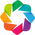

In [2]:
#Set up the bokeh extensions.
gv.extension('bokeh')
hv.extension('bokeh')
pn.extension()

## Import the Chemical data 

The first job of understanding chemical pollution is to get hold of the relevant data that we wish to analyse. For purposes of demonstration this notebook will only utilise 2 datasets, but the workflow presented here could be expanded to included other datasets as required. The two datasets used are as follows (dataset rouce details a re provided in the data sources section above):

1) Air Quality data from the UK AURN network
2) Measurements of veterinary medications in water from the EA GCMS/LCMS dataset.

For simplicity of loading the data used in this notebook has already been pre-processed and stored in parquet format for optimal loading. Otherwise the data has not been modified from the original source.

We also load in the a shapefile containing the UK boundaries for the Nomenclature of Territorial Units for Statistics (NUTS) level 1 regions. The NUTS regions are a classification system used in the European Union (EU) to define regions for statistical purposes and has been adopted by the UK for similar purposes in previous analyses. The level 1 regions are the highest sub-national level and represent large regions of the UK such as Scotland, Wales, North West England, etc. For computational efficiency we use the NUTS1 regions in this notebook, but the methods presented should work with any UK polygon shapefile. 

The code cell below loads in the data. 

In [3]:
#Set the location of the data.
data_path = "C:\\Users\\mhollaway\\Documents\\JNCC_SLI2_tool\\Test_data\\"

#Read in the NUTS regions - NUTS3 in this example.
NUTS_gdf = gpd.read_file(data_path + 'NUTS_Level_1_January_2018_GCB_in_the_United_Kingdom_2022_-2753267915301604886.geojson')

#Read in the pre-processed data.
all_data       = pl.read_parquet(data_path + "EEX_all_data.parquet")
Sites_info_gdf = gpd.read_parquet(data_path + "Sites_info_gdf.parquet")

Now that the data is loaded in we can take a quick look at the head of each dataframe to inspect the data structure and what we have in each datasets. Let's start with the airquality data. As out dataset contains both combined we need to filter on the air quality data only.

In [6]:
all_data.filter(pl.col('Measurement Category') == 'Air quality').head()

Pollutant,Concentration,Site_ID,Unit,Source,Site_Type,Date,Measurement Category,Longitude,Latitude
str,f64,str,str,str,str,"datetime[μs, UTC]",str,f64,f64
"""co""",1.033333,"""A3""","""mg/m3""","""aurn""","""Urban Traffic""",2000-01-01 00:00:00 UTC,"""Air quality""",-0.291853,51.37348
"""co""",0.783333,"""A3""","""mg/m3""","""aurn""","""Urban Traffic""",2000-01-02 00:00:00 UTC,"""Air quality""",-0.291853,51.37348
"""co""",0.454167,"""A3""","""mg/m3""","""aurn""","""Urban Traffic""",2000-01-03 00:00:00 UTC,"""Air quality""",-0.291853,51.37348
"""co""",1.004167,"""A3""","""mg/m3""","""aurn""","""Urban Traffic""",2000-01-04 00:00:00 UTC,"""Air quality""",-0.291853,51.37348
"""co""",0.665217,"""A3""","""mg/m3""","""aurn""","""Urban Traffic""",2000-01-05 00:00:00 UTC,"""Air quality""",-0.291853,51.37348


We can see that our dataset has the following columns:

1) Pollutant: The name of the chemical of being measured
2) Concentration: The concentration measured at the given location/time.
3) Site_ID: The unique identifier of the mesaurement site.
4) Unit: The unit of the concentration measurement.
5) Source: The source of the data.
6) Site_Type: The type of site being measured (E.g. Urban, Roadside, Rural)
7) Date: The date stamp of the measurement.
8) Measurement Category: The category of the measurement (E.g. Air Quality or Vet Med)
9) Longitude: The longitude of the measurement site.
10) Latitude: The Latitiude of the measurement site.

Now do the same thing for the water quality data.

In [7]:
all_data.filter(pl.col('Measurement Category') == 'Vet meds').head()

Pollutant,Concentration,Site_ID,Unit,Source,Site_Type,Date,Measurement Category,Longitude,Latitude
str,f64,str,str,str,str,"datetime[μs, UTC]",str,f64,f64
"""Fipronil""",0.5,"""49000209""","""ug/l""","""GCMS""","""PE""",2016-08-10 12:00:00 UTC,"""Vet meds""",0.113421,53.57023
"""Fipronil""",0.5,"""G0006097""","""ug/l""","""GCMS""","""FZ""",2022-08-16 08:16:00 UTC,"""Vet meds""",-1.144528,50.887405
"""Fipronil""",0.5,"""MISCTL66""","""ug/l""","""GCMS""","""PE""",2011-05-22 02:35:00 UTC,"""Vet meds""",0.340553,52.214984
"""Fipronil""",0.5,"""MISCSK95""","""ug/l""","""GCMS""","""PE""",2011-07-09 23:10:00 UTC,"""Vet meds""",-0.65915,53.039711
"""Fipronil""",0.5,"""MISCSK95""","""ug/l""","""GCMS""","""PE""",2011-07-10 08:26:00 UTC,"""Vet meds""",-0.65915,53.039711


Now that we have inspected our data we can have a quick look at the NUTS1 regions to see what they look like.

<Axes: >

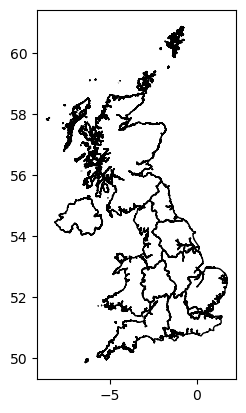

In [11]:
NUTS_gdf.plot(facecolor='none', edgecolor='black')

## Example Place Based Analysis.

Now that we have all our data loaded and we have a basic understanding of what it contains we can start thinking about asking hypothetical questions about the dataset. In this example we want to ask 'I lived in the North East of England from 2000 to 2025, what sort of pollution might I have been exposed to?'

First lets plot a close up of our region of interest and see how many measurement sites we have in that region. 

In [ ]:
NUTS_plt = gv.Polygons(NUTS_gdf, vdims=['nuts118cd','nuts118nm']).opts(color='black', fill_alpha=0, projection=ccrs.PlateCarree(),width=600,height=1000, tools=['hover', 'tap'], active_tools=['tap'], shared_axes=False)


In [ ]:
#Function to calculate a summary of the chemical data in a selected region. 
def calc_chem_summary(index):

    #Check for empty index if no selection yet made.
    if not index:
        out_col_list = ['Pollutant', 'Min Concentration', 'Max Concentration', 'Mean Concentration',
                        'Number of Sites', 'Measurement Category', 'Unit', 'Measurement Source',
                        'Sample Type', 'Date of first measurement', 'Date of last measurement']
        return hv.Table(pd.DataFrame(columns=out_col_list)).opts(width=1200, height=400)

    #If we have an index pick the geometry for filtering.
    selected_poly = NUTS_gdf.geometry.iloc[index[0]]

    # Filter sites in a specific polygon - this will be picked up using the index from the selector.
    Sites_in_poly = Sites_info_gdf['Site_ID'].loc[Sites_info_gdf.geometry.within(selected_poly)]

    #If no chemicals for given site pass back empty table.
    if Sites_in_poly.shape[0] == 0:
        out_col_list = ['Pollutant', 'Min Concentration', 'Max Concentration', 'Mean Concentration',
                        'Number of Sites', 'Measurement Category', 'Unit', 'Measurement Source',
                        'Sample Type', 'Date of first measurement', 'Date of last measurement']
        return hv.Table(pd.DataFrame(columns=out_col_list)).opts(width=1200, height=400)
    else:

        # Get the data.
        curr_rgn_data = all_data.filter((pl.col('Site_ID').is_in(Sites_in_poly) == True) & (pl.col('Concentration') > 0.0))

        #Get the required summary for the region.
        summ_rgn_data = curr_rgn_data.group_by('Pollutant').agg([
            pl.col('Concentration').min().alias('Min Concentration'),
            pl.col('Concentration').max().alias('Max Concentration'),
            pl.col('Concentration').mean().alias('Mean Concentration'),
            pl.col('Site_ID').n_unique().alias('Number of Sites'),
            pl.col('Measurement Category').unique().alias('Measurement Category'),
            pl.col('Unit').unique().alias('Unit'),
            pl.col('Source').unique().alias('Measurement Source'),
            pl.col('Site_Type').unique().alias('Sample Type'),
            pl.col('Date').min().alias('Date of first measurement'),
            pl.col('Date').max().alias('Date of last measurement')])

        #Format the correct output for columns where multiple categories are returned.
        summ_rgn_data = summ_rgn_data.with_columns(pl.col('Unit').list.join(',').alias('Unit'),
                                                   pl.col('Measurement Source').list.join(',').alias('Measurement Source'),
                                                   pl.col('Sample Type').list.join(',').alias('Sample Type'))


        #Return either as a holoviews table (if in a panel app) or a pandas dataframe (if in the notebook)
        if pn.state.served == True:
            summ_reg_table = hv.Table(summ_rgn_data.to_pandas()).opts(width=1200, height=400)
        else:
            summ_reg_table = summ_rgn_data.to_pandas()
        
        return summ_reg_table

In [ ]:
calc_chem_summary([0])

In [ ]:
def plot_chem_sites(index, chem):

    #If no selection made display nothing.
    if not index:
        return gv.Polygons([], label='Please select a polygon to view data').opts(width=800,height=400, shared_axes=False)

    # If we have an index pick the geometry for filtering.
    selected_poly = NUTS_gdf.geometry.iloc[index[0]]
    Sites_in_poly = Sites_info_gdf[['Site_ID', 'geometry']].loc[Sites_info_gdf.geometry.within(selected_poly)]

    # Get the data.
    curr_rgn_data = all_data.filter(pl.col('Site_ID').is_in(Sites_in_poly['Site_ID']) == True).select(['Site_ID', 'Pollutant', 'Concentration','Measurement Category'])

    #If no data for the selected chemical return nothing.
    if curr_rgn_data.shape[0] == 0:
        if pn.state.served == True:
            return gv.Polygons([], label='No Data for selected chemical for this region.').opts(width=800,height=400, shared_axes=False)

    #Run a check on data type to plot, for vet meds plot locations and heatmap by samples, if AQ plot spatial distribution based on measurements.
    if curr_rgn_data.filter(pl.col('Pollutant') == chem).select('Measurement Category').unique().item() == 'Vet meds':

        count_df = curr_rgn_data.filter(pl.col('Pollutant') == chem).group_by('Site_ID').agg([pl.col('Concentration').mean().alias('Mean_Concentration')])

        curr_chem_pts = Sites_in_poly.merge(count_df.to_pandas(), on='Site_ID')

        #Now create the map.
        #If in panel app pass out interactive plot if in regular notebook pass out static plot.
        if pn.state.served == True:

            #Polygons first.
            curr_poly_layer = gv.Polygons(selected_poly).opts(color='black', fill_alpha=0, line_width=2, projection=ccrs.PlateCarree()) #Fill alpha sets fill to transparent.!
            #Create a heatmap of points based on number of samples.
            curr_pts_layer  = gv.Points(curr_chem_pts, vdims=['Site_ID','Mean_Concentration']).opts(
                                        size=10,
                                        color='Mean_Concentration',
                                        cmap='Viridis',
                                        tools=['hover'],
                                        width=600,
                                        height=400,
                                        title='Mean Concentration of ' + chem + '(2000-2025) for: ' + NUTS_gdf['nuts118nm'].iloc[index[0]]
                                        )

            #Create the combined plot and set the dimensions.
            curr_chem_plot  = (curr_poly_layer * curr_pts_layer).opts(width=800,height=400, shared_axes=False)

        else:

            #Plot the data as a staic matplotlib plot if not in a panel app.        
            fig, ax = plt.subplots(figsize=(7, 5))

            #Polygon.
            NUTS_gdf.iloc[[index[0]]].plot(ax=ax, facecolor='none', edgecolor='black')

            # Overlay points
            points = ax.scatter(curr_chem_pts.geometry.x, curr_chem_pts.geometry.y, c=curr_chem_pts.Mean_Concentration, cmap='viridis', s=50, edgecolor='black', label='Measurement Sites')
            fig.colorbar(points, ax=ax, label='Mean Concentration')

            # Add labels and legend
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')

            #Set the title.
            ax.set_title('Mean Concentration of ' + chem + '(2000-2025) for: ' + NUTS_gdf['nuts118nm'].iloc[index[0]])

            curr_chem_plot = fig



    elif curr_rgn_data.filter(pl.col('Pollutant') == chem).select('Measurement Category').unique().item() == 'Air quality':

        #Calculate the total exposure to the air pollutant.
        total_exp_df  = curr_rgn_data.filter(pl.col('Pollutant') == chem).group_by('Site_ID').agg([pl.col('Concentration').mean().alias('Mean Exposure')])
        curr_chem_pts = Sites_in_poly.merge(total_exp_df.to_pandas(), on='Site_ID')
        #Filter on where we have data.
        curr_chem_pts = curr_chem_pts.loc[(curr_chem_pts['Mean Exposure'] > 0.0) & (curr_chem_pts['Mean Exposure'].isnull() == False)]

        # KDE heatmap
        x = curr_chem_pts.geometry.x
        y = curr_chem_pts.geometry.y
        weights = curr_chem_pts['Mean Exposure'].values

        # Grid over polygon bounds - this will be used to model the exposure across the region on.
        xmin, ymin, xmax, ymax = selected_poly.bounds
        xx, yy    = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] #Meshgrid for modelling the KDE on

        # Quick check to see if we have enough data to fit the interpolation - if not just pass out zeros.
        if len(weights) >= 4:
          density = griddata(np.column_stack([x,y]), weights, (xx, yy), method='linear')
        else:
          density = np.zeros(xx.shape)

        #Depending on if running in a notebook render as either holoviews (panel app) or matplotlib (notebook).
        if pn.state.served == True:

            # Holoviews Image
            AQ_heatmap = hv.QuadMesh((xx,yy,density)).opts(cmap='Viridis',alpha=0.6,tools=['hover'],line_color=None,line_width=1,
                                                        width=600,
                                                        height=400,title='Air pollutant exposure: ' + chem)

            #Also add the locations of the sampling points for the current AQ pollutant.
            curr_pts_layer = gv.Points(curr_chem_pts, vdims=['Site_ID']).opts(
                size=10,
                color='Black',
                tools=['hover'],
                width=600,
                height=400,
                title='Sample Density Heatmap'
            )


            #Polygon layer.
            curr_poly_layer = gv.Polygons(selected_poly).opts(color='black', fill_alpha=0, line_width=2,projection=ccrs.PlateCarree())  # Fill alpha sets fill to transparent.!

            #Produce the final plot.
            curr_chem_plot = (curr_poly_layer * AQ_heatmap * curr_pts_layer).opts(width=600, height=400, shared_axes=False)

        else:

            fig, ax = plt.subplots(figsize=(7, 5))

            #Plot the data as a staic matplotlib plot if not in a panel app.
            mesh = ax.pcolormesh(xx, yy, density, cmap='viridis', shading='auto')
            fig.colorbar(mesh, ax=ax, label='Total Concentration')

            #Polygon.
            NUTS_gdf.iloc[[index[0]]].plot(ax=ax, facecolor='none', edgecolor='black')

            # Overlay points
            ax.scatter(curr_chem_pts.geometry.x, curr_chem_pts.geometry.y, color='black', s=50, edgecolor='black', label='Measurement Sites')

            # Add labels and legend
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')

            #Set the title.
            ax.set_title('Air pollutant exposure: ' + chem + ' for: ' + NUTS_gdf['nuts118nm'].iloc[index[0]])

            curr_chem_plot = fig

    return curr_chem_plot

In [ ]:
plot_chem_sites([0], 'no2')

In [ ]:
#Only run this cell if in a panel app.
if pn.state.served == True:

    #Now set up the notebook to run interactively if served via panel.
    #Create a selection stream - this will be used to pick up the chemical data for each region.
    selection_summary = Selection1D(source=NUTS_plt)

    #Create a panel widget that holds the list of available chemicals.
    chem_options = pn.widgets.Select(name='List of Chemicals', options=[])

    #Callback function to update the widget.
    #Need to se watch to true here as panel is updating the widget.
    @pn.depends(selection_summary.param.index, watch=True)
    def update_chem_options(index):

        if index:
            selected_poly        = NUTS_gdf.geometry.iloc[index[0]]
            Sites_in_poly        = Sites_info_gdf['Site_ID'].loc[Sites_info_gdf.geometry.within(selected_poly)]
            if Sites_in_poly.shape[0] == 0:
                chem_options.options = ['No Chemicals Found']
                chem_options.value = 'No Chemicals Found'
            else:
                chem_options.options = all_data.filter(pl.col('Site_ID').is_in(Sites_in_poly) == True).get_column('Pollutant').unique().to_list()
                chem_options.value   = all_data.filter(pl.col('Site_ID').is_in(Sites_in_poly) == True).get_column('Pollutant').unique().to_list()[0]
        else:
            chem_options.options = ['No Chemicals Found']
            chem_options.value = 'No Chemicals Found'

    #Now need to set up reactive versions of the above functions to work in panel.
    chem_summary_reactive = pn.bind(calc_chem_summary, selection_summary.param.index)
    chem_plot_reactive    = pn.bind(plot_chem_sites, selection_summary.param.index, chem_options.param.value)

    #Create the panel layout and serve.
    dashboard = pn.Row(pn.Column(NUTS_plt) , pn.Column(pn.panel(chem_summary_reactive), pn.panel(chem_options), pn.panel(chem_plot_reactive)))
    dashboard.servable()
